<a href="https://colab.research.google.com/github/ArtisticWenny/datasci_6_regression/blob/main/datasci_6_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOADING IN PACKAGES AND DATASET
---



In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
csv_file_path = ['/content/drive/MyDrive/Summary of Weather.csv']

df = pd.read_csv('/content/drive/MyDrive/Summary of Weather.csv')

print(df.head)

<bound method NDFrame.head of           STA        Date Precip  WindGustSpd    MaxTemp    MinTemp  \
0       10001    1942-7-1  1.016          NaN  25.555556  22.222222   
1       10001    1942-7-2      0          NaN  28.888889  21.666667   
2       10001    1942-7-3   2.54          NaN  26.111111  22.222222   
3       10001    1942-7-4   2.54          NaN  26.666667  22.222222   
4       10001    1942-7-5      0          NaN  26.666667  21.666667   
...       ...         ...    ...          ...        ...        ...   
119035  82506  1945-12-27      0          NaN  28.333333  18.333333   
119036  82506  1945-12-28  9.906          NaN  29.444444  18.333333   
119037  82506  1945-12-29      0          NaN  28.333333  18.333333   
119038  82506  1945-12-30      0          NaN  28.333333  18.333333   
119039  82506  1945-12-31      0          NaN  29.444444  17.222222   

         MeanTemp Snowfall PoorWeather  YR  ...  FB  FTI ITH  PGT  TSHDSBRSGF  \
0       23.888889      0.0         N

<ipython-input-3-e92ce422878f>:3: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Summary of Weather.csv')


In [4]:
csv_file_path = ['/content/drive/MyDrive/Weather Station Locations.csv']

df2 = pd.read_csv('/content/drive/MyDrive/Weather Station Locations.csv')

print(df2.head)

<bound method NDFrame.head of       WBAN            NAME STATE/COUNTRY ID    LAT     LON  ELEV   Latitude  \
0    33013          AIN EL               AL  3623N  00637E   611  36.383333   
1    33031        LA SENIA               AL  3537N  00037E    88  35.616667   
2    33023  MAISON BLANCHE               AL  3643N  00314E    23  36.716667   
3    33044        TELERGMA               AL  3607N  00621E   754  36.116667   
4    12001         TINDOUF               AL  2741N  00809W   443  27.683333   
..     ...             ...              ...    ...     ...   ...        ...   
156  33109       EL AQUINA               TS  3651N  01015E     4  36.850000   
157  33121         EL DJEM               TS  3520N  01040E  9999  35.333333   
158  33003      SISI AHMED               TS  3712N  00950E     4  37.200000   
159  33307           ADANA               TU  3659N  03518E    20  36.983333   
160  15027      WARRINGTON               UK  5323N  00239W    27  53.383333   

     Longitude  
0   

In [5]:
df.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [6]:
df2.columns

Index(['WBAN', 'NAME', 'STATE/COUNTRY ID', 'LAT', 'LON', 'ELEV', 'Latitude',
       'Longitude'],
      dtype='object')

In [7]:
df.dtypes

STA              int64
Date            object
Precip          object
WindGustSpd    float64
MaxTemp        float64
MinTemp        float64
MeanTemp       float64
Snowfall        object
PoorWeather     object
YR               int64
MO               int64
DA               int64
PRCP            object
DR             float64
SPD            float64
MAX            float64
MIN            float64
MEA            float64
SNF             object
SND            float64
FT             float64
FB             float64
FTI            float64
ITH            float64
PGT            float64
TSHDSBRSGF      object
SD3            float64
RHX            float64
RHN            float64
RVG            float64
WTE            float64
dtype: object

In [8]:
df2.dtypes

WBAN                  int64
NAME                 object
STATE/COUNTRY ID     object
LAT                  object
LON                  object
ELEV                  int64
Latitude            float64
Longitude           float64
dtype: object

SIMPLE LINEAR REGRESSION

---





In [9]:
 Fit the regression model
# thalach = independent variable(x); chol = dependent variable (y)
X = sm.add_constant(df['Precip'])  # Adds a constant term to the predictor
model = sm.OLS(df['MeanTemp'], X).fit()

SyntaxError: ignored

UFuncTypeError: ignored

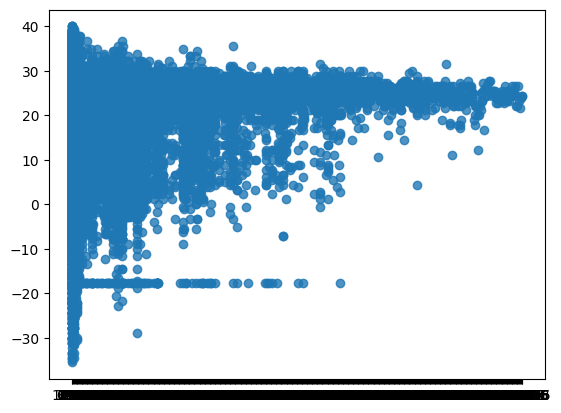

In [31]:
sns.regplot(data=df, x='Precip', y='MeanTemp')


In [ ]:
# Extract model parameters
slope = model.params['Precip']
intercept = model.params['MeanTemp']
r_squared = model.rsquared

# Display results
print(f"Slope (Coefficient for Precip): {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared value: {r_squared:.2f}")

# For a detailed summary:
print(model.summary())


ASSUMPTIONS

In [ ]:
residuals = model.resid
fitted = model.fittedvalues

In [ ]:
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

MULTIPLE LINEAR REGRESSION

In [ ]:
X = df2[['LAT', 'LON','ELEV']]
X = sm.add_constant(X)
y = df['PoorWeather']
model2 = sm.OLS(y, X)
results = model2.fit()